In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/SDSS_ML_P_SI_ZOHO/sdss_100k_galaxy_form_burst.csv'
data_sdss_raw = pd.read_csv(file_path, sep=",", skiprows=1, low_memory=False)

# Inspect the data
print(data_sdss_raw.head())
print(data_sdss_raw.info())
print(data_sdss_raw.isnull().sum())
print(data_sdss_raw.describe())

                 objid            specobjid          ra       dec           u  \
0  1237646587710669400  8175185722644649984   82.038679  0.847177    21.73818   
1  1237646588247540577  8175186822156277760   82.138894  1.063072    20.66761   
2  1237646588247540758  8175187097034184704   82.028510  1.104003    23.63531   
3  1237648702973083853   332152325571373056  198.544469 -1.097059    20.12374   
4  1237648702973149350   332154249716721664  198.706864 -1.046217 -9999.00000   

            g         r         i         z  modelFlux_u  ...  psfMag_z  \
0    20.26633  19.32409  18.64037  18.23833     2.007378  ...  19.43575   
1    19.32016  18.67888  18.24693  18.04122     5.403369  ...  18.85012   
2    21.19671  19.92297  19.31443  18.68396     0.295693  ...  19.42235   
3    18.41520  17.47202  17.05297  16.72423     8.920645  ...  18.03204   
4 -9999.00000  18.37762  18.13383  17.78497     0.000000  ...  19.02880   

       expAB_u      expAB_g   expAB_r   expAB_i   expAB_z   cl

In [ ]:
import numpy as np

data_sdss_replace = data_sdss_raw.copy()

# Replace -9999 with NaN
data_sdss_replace = data_sdss_replace.replace(-9999, np.nan)

# Verify
print(data_sdss_replace[['u','g','z','expAB_u']].head(10))
print(data_sdss_replace.head())
print(data_sdss_replace.info())
print(data_sdss_replace.isnull().sum())

          u         g         z   expAB_u
0  21.73818  20.26633  18.23833  0.099951
1  20.66761  19.32016  18.04122  0.366549
2  23.63531  21.19671  18.68396  0.050000
3  20.12374  18.41520  16.72423  0.310763
4       NaN       NaN  17.78497       NaN
5  19.47473  18.18575  16.89580  0.754158
6  20.24418  18.62780  16.97725  0.273089
7  18.46020  17.27620  16.04085  0.849475
8  18.70091  17.50793  16.54133  0.419439
9  19.88486  18.45146  16.73163  0.699929
                 objid            specobjid          ra       dec         u  \
0  1237646587710669400  8175185722644649984   82.038679  0.847177  21.73818   
1  1237646588247540577  8175186822156277760   82.138894  1.063072  20.66761   
2  1237646588247540758  8175187097034184704   82.028510  1.104003  23.63531   
3  1237648702973083853   332152325571373056  198.544469 -1.097059  20.12374   
4  1237648702973149350   332154249716721664  198.706864 -1.046217       NaN   

          g         r         i         z  modelFlux_u  ...  ps

/tmp/ipython-input-4008374402.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percent.index, y=missing_percent.values, palette="viridis")


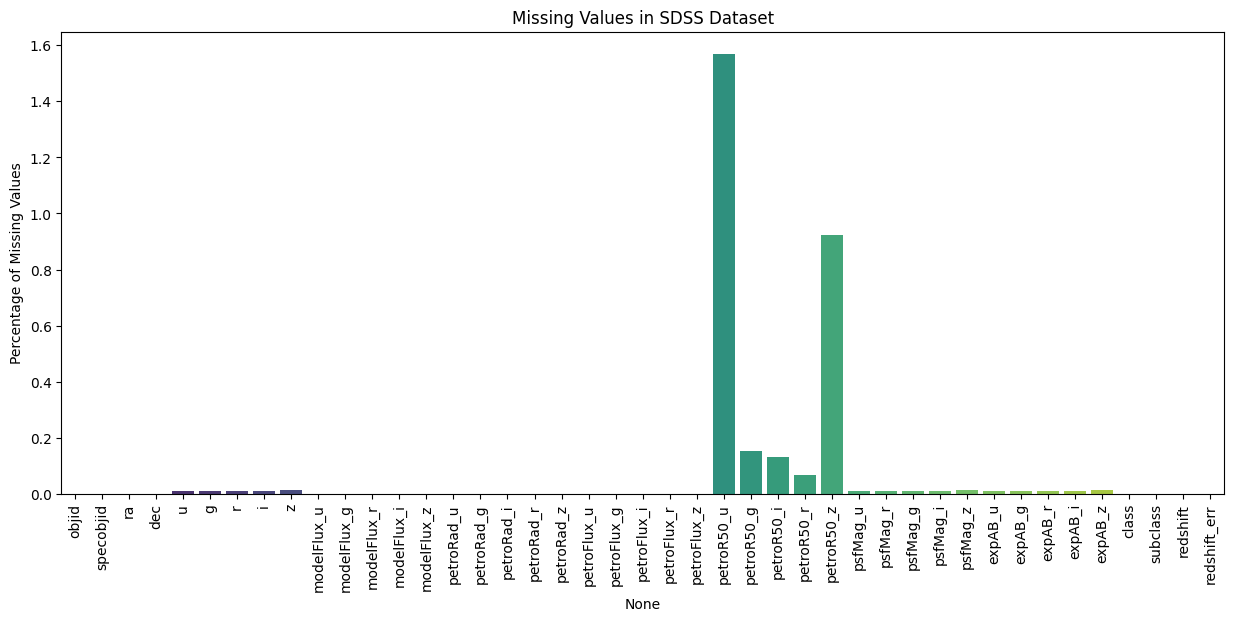

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Percentage of missing values per column
missing_percent = data_sdss_replace.isnull().mean() * 100

# Plot missing values as bar chart
plt.figure(figsize=(15,6))
sns.barplot(x=missing_percent.index, y=missing_percent.values, palette="viridis")
plt.xticks(rotation=90)
plt.ylabel("Percentage of Missing Values")
plt.title("Missing Values in SDSS Dataset")
plt.show()


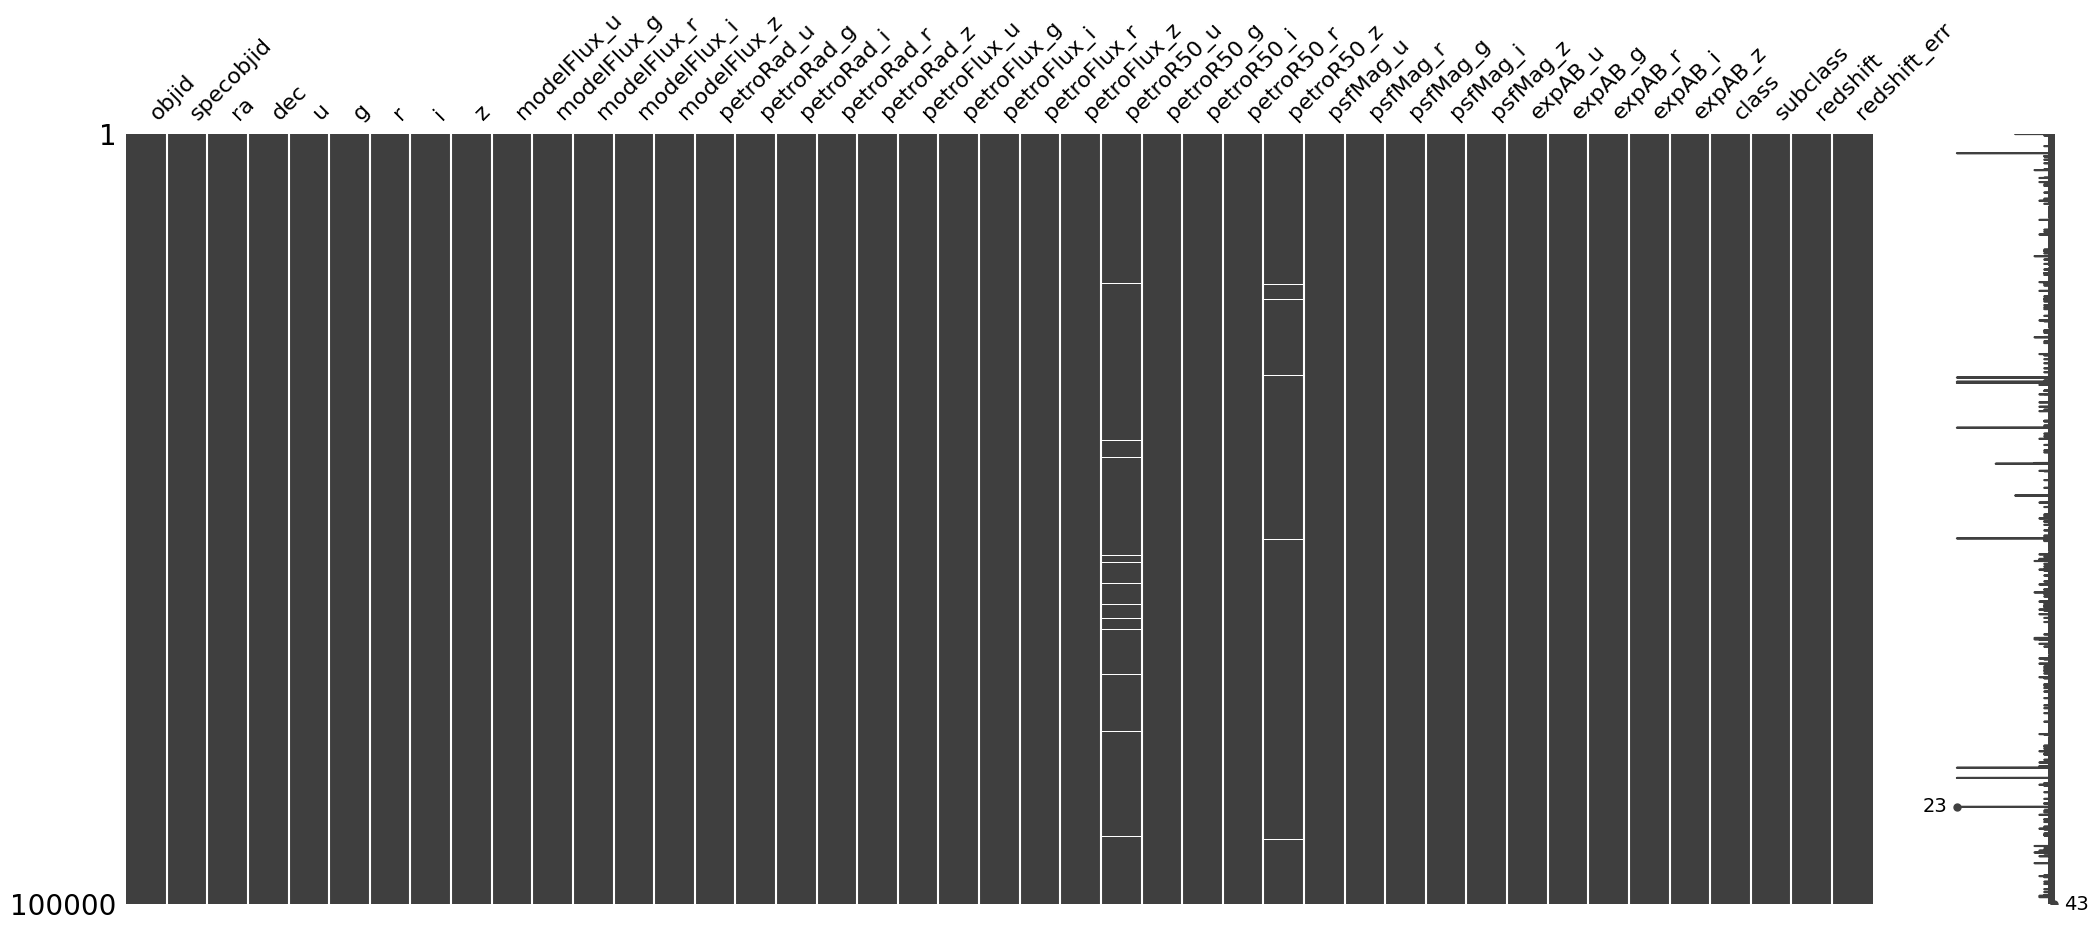

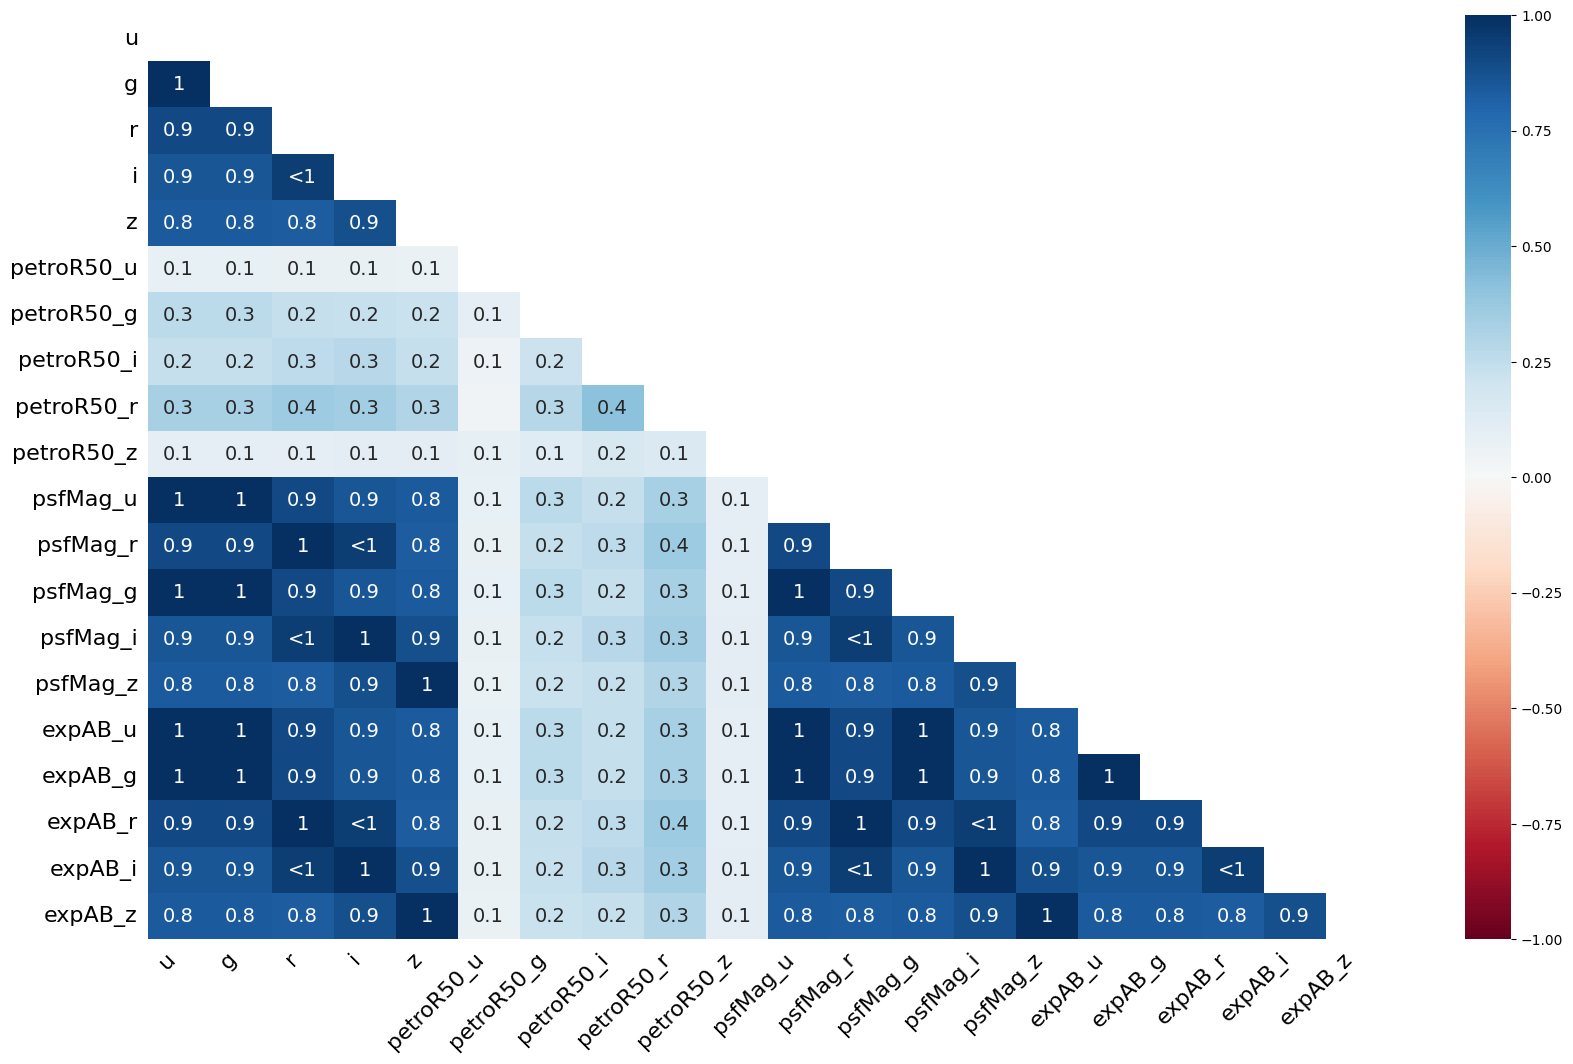

In [ ]:
import missingno as msno

# Matrix of missing values
msno.matrix(data_sdss_replace)
plt.show()

# Heatmap of correlations between missing values
msno.heatmap(data_sdss_replace)
plt.show()


In [ ]:
data_sdss_impute = data_sdss_replace.copy()

# Import library
from sklearn.impute import SimpleImputer

# Select numeric columns
numeric_cols = data_sdss_impute.select_dtypes(include=np.number).columns

# Median imputer
median_imputer = SimpleImputer(strategy='median')
data_sdss_impute[numeric_cols] = median_imputer.fit_transform(data_sdss_impute[numeric_cols])

# Verify no more missing values
print(data_sdss_impute.head())
print(data_sdss_impute.info())
print(data_sdss_impute.isnull().sum())


          objid     specobjid          ra       dec         u         g  \
0  1.237647e+18  8.175186e+18   82.038679  0.847177  21.73818  20.26633   
1  1.237647e+18  8.175187e+18   82.138894  1.063072  20.66761  19.32016   
2  1.237647e+18  8.175187e+18   82.028510  1.104003  23.63531  21.19671   
3  1.237649e+18  3.321523e+17  198.544469 -1.097059  20.12374  18.41520   
4  1.237649e+18  3.321542e+17  198.706864 -1.046217  19.34985  18.07271   

          r         i         z  modelFlux_u  ...  psfMag_z   expAB_u  \
0  19.32409  18.64037  18.23833     2.007378  ...  19.43575  0.099951   
1  18.67888  18.24693  18.04122     5.403369  ...  18.85012  0.366549   
2  19.92297  19.31443  18.68396     0.295693  ...  19.42235  0.050000   
3  17.47202  17.05297  16.72423     8.920645  ...  18.03204  0.310763   
4  18.37762  18.13383  17.78497     0.000000  ...  19.02880  0.508736   

    expAB_g   expAB_r   expAB_i   expAB_z   class     subclass  redshift  \
0  0.311864  0.289370  0.270588  0

In [ ]:
data_sdss_nonulls = data_sdss_replace.copy()

# Drop all rows with any missing values
data_sdss_nonulls = data_sdss_nonulls.dropna()

# Verify the result
print(data_sdss_nonulls.head())
print(data_sdss_nonulls.info())
print(data_sdss_nonulls.isnull().sum())
print(data_sdss_nonulls.describe())

                 objid            specobjid          ra       dec         u  \
0  1237646587710669400  8175185722644649984   82.038679  0.847177  21.73818   
1  1237646588247540577  8175186822156277760   82.138894  1.063072  20.66761   
2  1237646588247540758  8175187097034184704   82.028510  1.104003  23.63531   
3  1237648702973083853   332152325571373056  198.544469 -1.097059  20.12374   
5  1237648702973149360   332153425083000832  198.720675 -1.083876  19.47473   

          g         r         i         z  modelFlux_u  ...  psfMag_z  \
0  20.26633  19.32409  18.64037  18.23833     2.007378  ...  19.43575   
1  19.32016  18.67888  18.24693  18.04122     5.403369  ...  18.85012   
2  21.19671  19.92297  19.31443  18.68396     0.295693  ...  19.42235   
3  18.41520  17.47202  17.05297  16.72423     8.920645  ...  18.03204   
5  18.18575  17.52763  17.14837  16.89580    16.220930  ...  18.23220   

    expAB_u   expAB_g   expAB_r   expAB_i   expAB_z   class     subclass  \
0  0.09995

In [ ]:
# Unique values in 'class'
print("Class column unique values:")
print(data_sdss_nonulls['class'].unique())

# Unique values in 'subclass'
print("\nSubclass column unique values:")
print(data_sdss_nonulls['subclass'].unique())


Class column unique values:
['GALAXY']

Subclass column unique values:
['STARFORMING' 'STARBURST']


In [ ]:
# Encode 'subclass' column: STARFORMING -> 0, STARBURST -> 1
data_sdss_nonulls['subclass'] = data_sdss_nonulls['subclass'].map({'STARFORMING': 0, 'STARBURST': 1})

# Verify transformation
print(data_sdss_nonulls['subclass'].value_counts())


subclass
0    73518
1    23960
Name: count, dtype: int64


In [ ]:
# Numeric columns
numeric_cols = data_sdss_nonulls.select_dtypes(include=np.number).columns

# Summary statistics
desc_stats = data_sdss_nonulls[numeric_cols].describe().T
desc_stats['skew'] = data_sdss_nonulls[numeric_cols].skew()
desc_stats['kurtosis'] = data_sdss_nonulls[numeric_cols].kurtosis()
desc_stats


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
objid,97478.0,1.237659e+18,6.049277e+12,1.237646e+18,1.237655e+18,1.237659e+18,1.237663e+18,1.237681e+18,0.475678,0.455960
specobjid,97478.0,2.205947e+18,2.427249e+18,2.994897e+17,8.096168e+17,1.426538e+18,2.283458e+18,1.412691e+19,2.324714,5.091270
ra,97478.0,1.808714e+02,7.552124e+01,8.745004e-03,1.391862e+02,1.817272e+02,2.238932e+02,3.599979e+02,-0.099520,0.581864
dec,97478.0,2.340828e+01,2.113938e+01,-1.124427e+01,3.096875e+00,2.067831e+01,4.213565e+01,6.869526e+01,0.260306,-1.272138
u,97478.0,1.953565e+01,1.414031e+00,1.275383e+01,1.874529e+01,1.932603e+01,2.000255e+01,3.032766e+01,0.883956,1.823458
g,97478.0,1.828696e+01,1.467872e+00,1.182223e+01,1.748946e+01,1.805269e+01,1.858087e+01,2.820796e+01,0.908587,1.225656
r,97478.0,1.765396e+01,1.455235e+00,1.124544e+01,1.688251e+01,1.744132e+01,1.785543e+01,2.804580e+01,0.969181,1.550922
i,97478.0,1.729551e+01,1.478748e+00,1.071159e+01,1.651088e+01,1.707222e+01,1.751985e+01,2.509231e+01,1.073057,1.858261
z,97478.0,1.707661e+01,1.515657e+00,1.025513e+01,1.626354e+01,1.684118e+01,1.736846e+01,2.414099e+01,1.108895,2.018349
modelFlux_u,97478.0,3.128086e+01,7.702679e+01,-2.650383e+01,9.974552e+00,1.860213e+01,3.175972e+01,7.915306e+03,33.190891,2359.150874


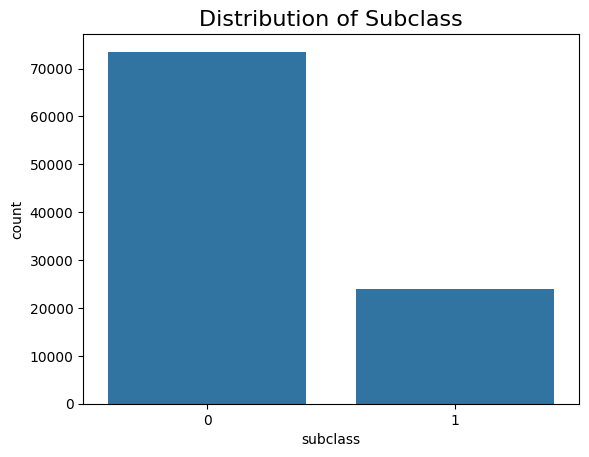

In [ ]:
sns.countplot(x='subclass', data=data_sdss_nonulls)
plt.title('Distribution of Subclass', fontsize=16)
plt.show()


Features selected for plotting: ['i', 'z', 'modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i', 'modelFlux_z', 'petroRad_u', 'petroRad_g', 'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroFlux_u', 'petroFlux_g', 'petroFlux_i', 'petroFlux_r', 'petroFlux_z', 'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r', 'petroR50_z', 'subclass', 'redshift', 'redshift_err']


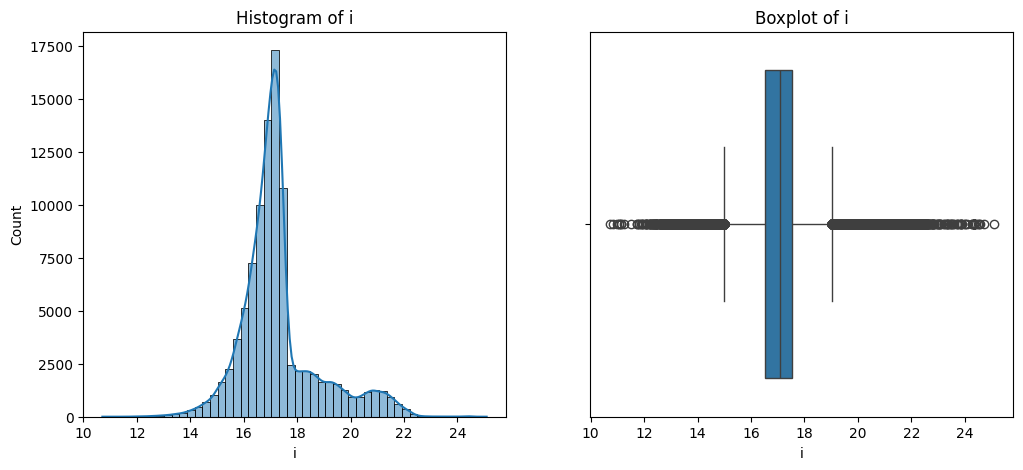

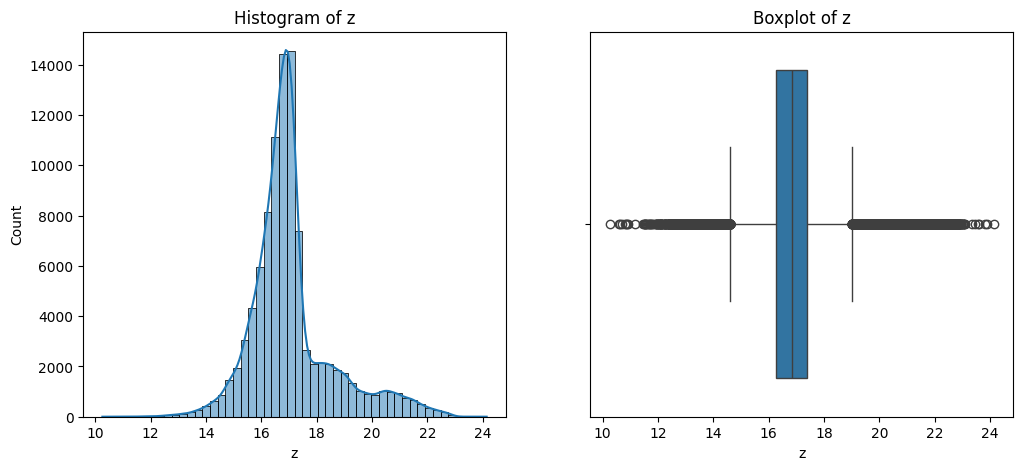

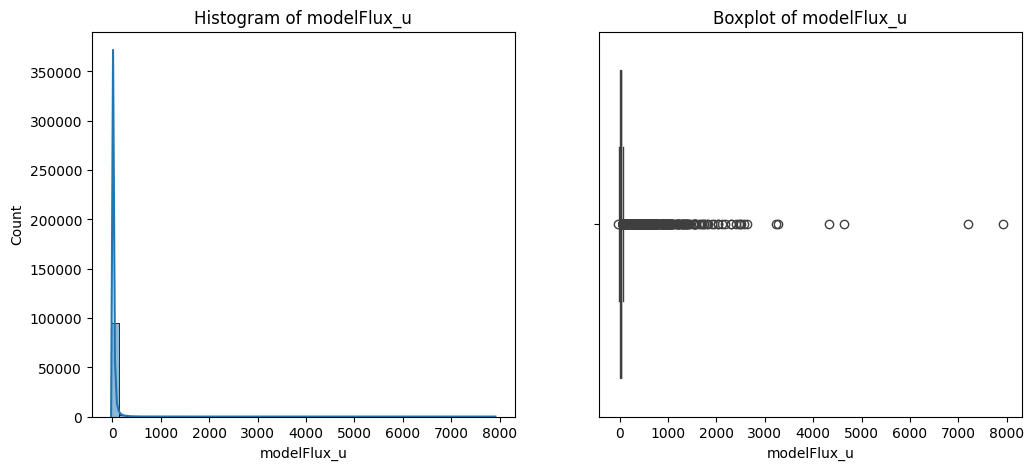

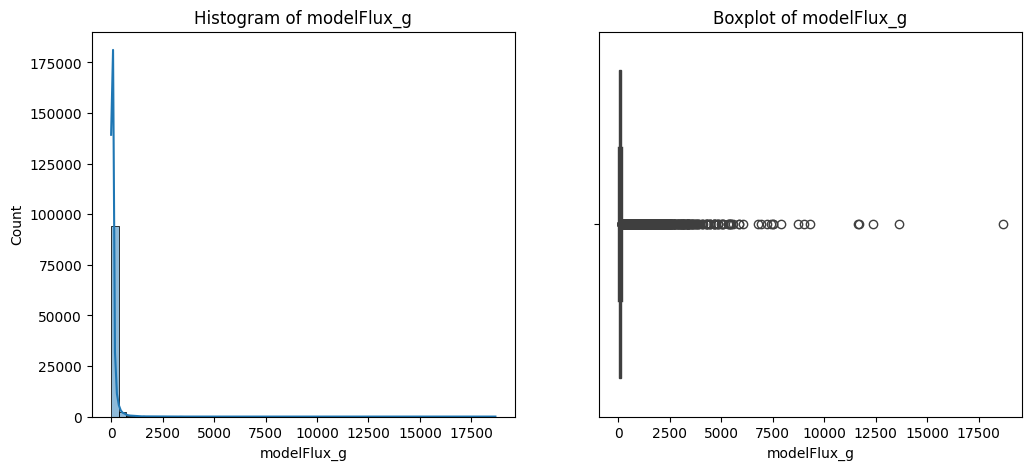

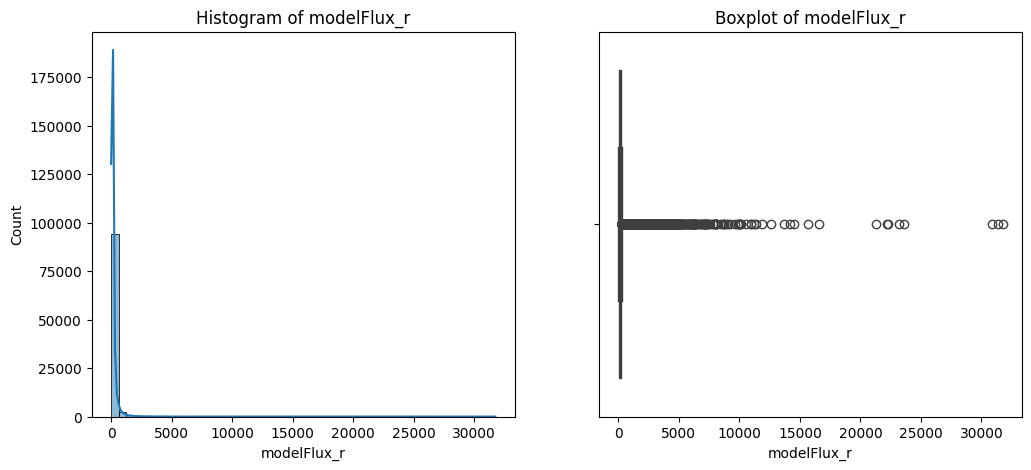

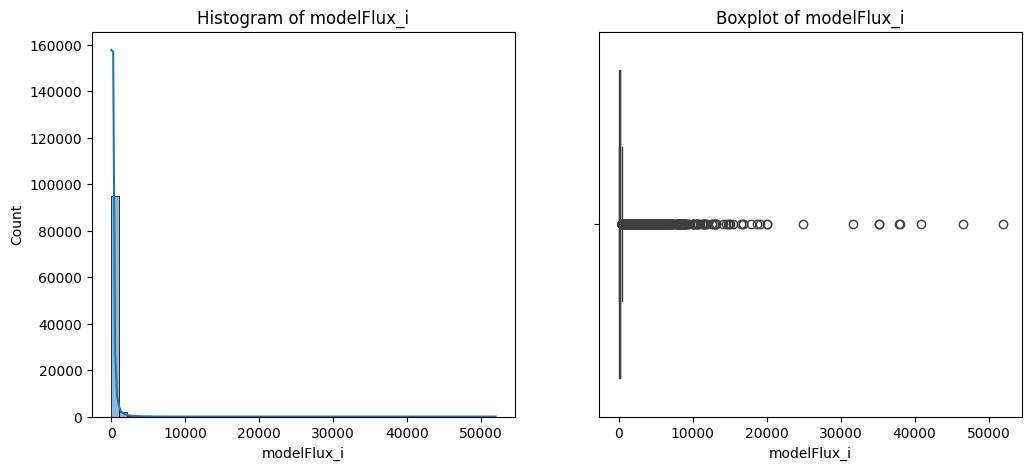

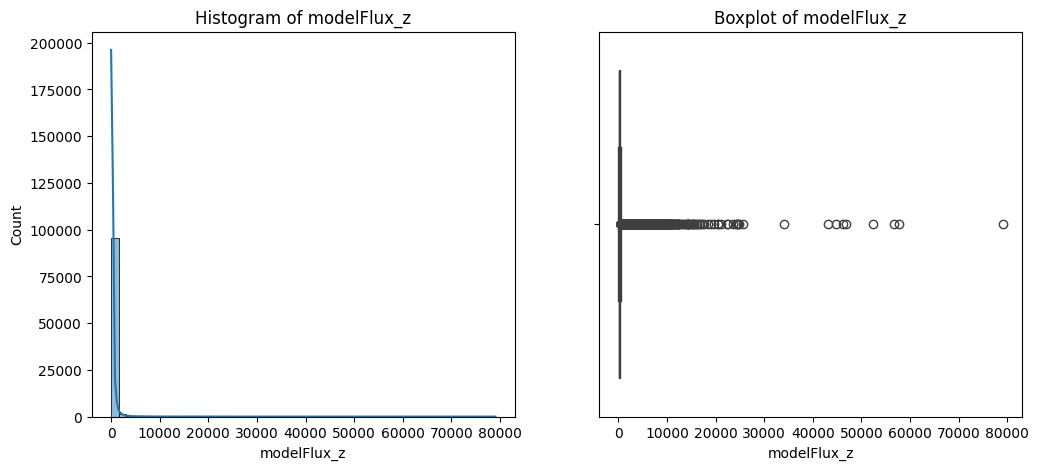

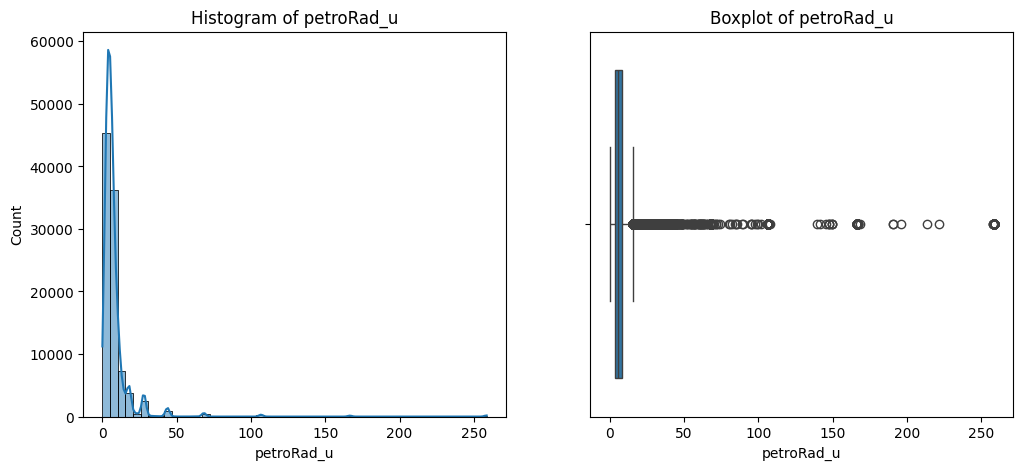

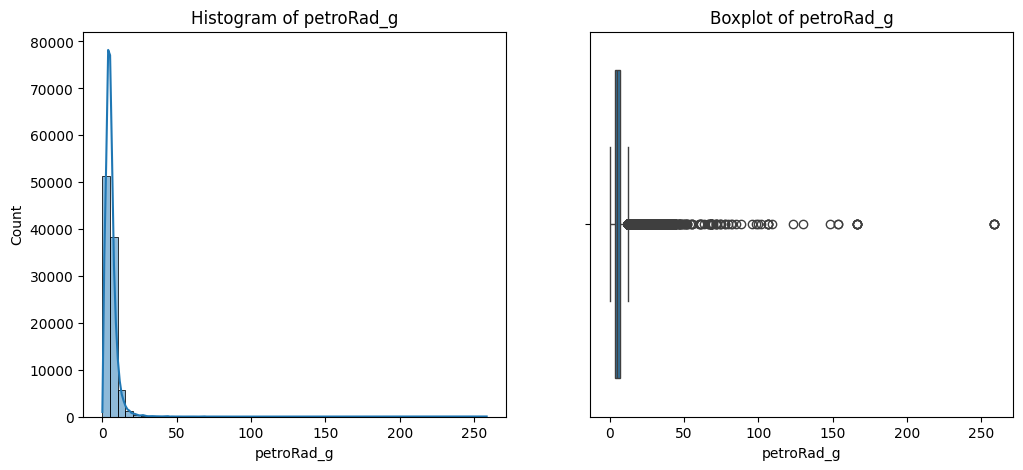

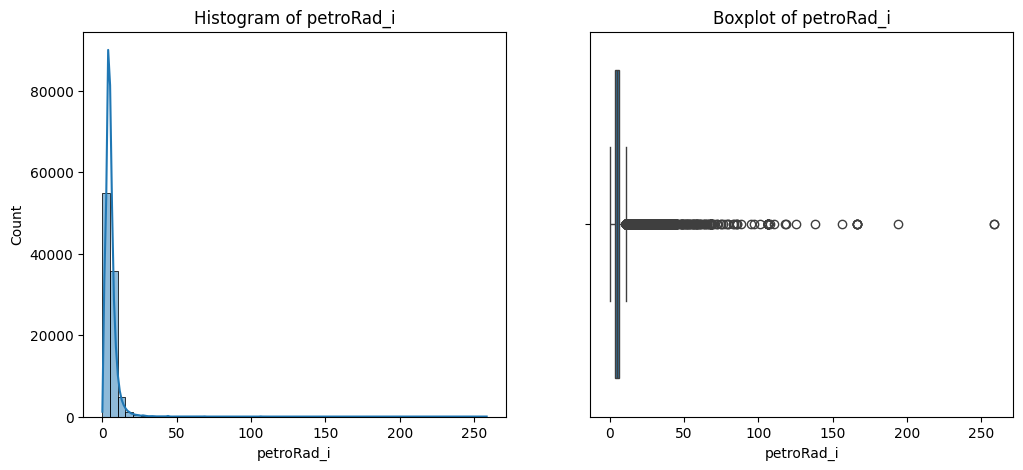

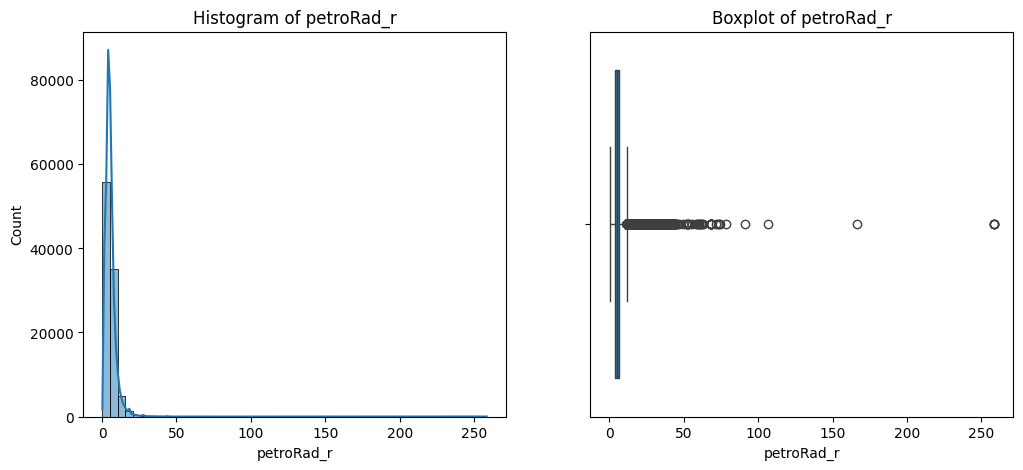

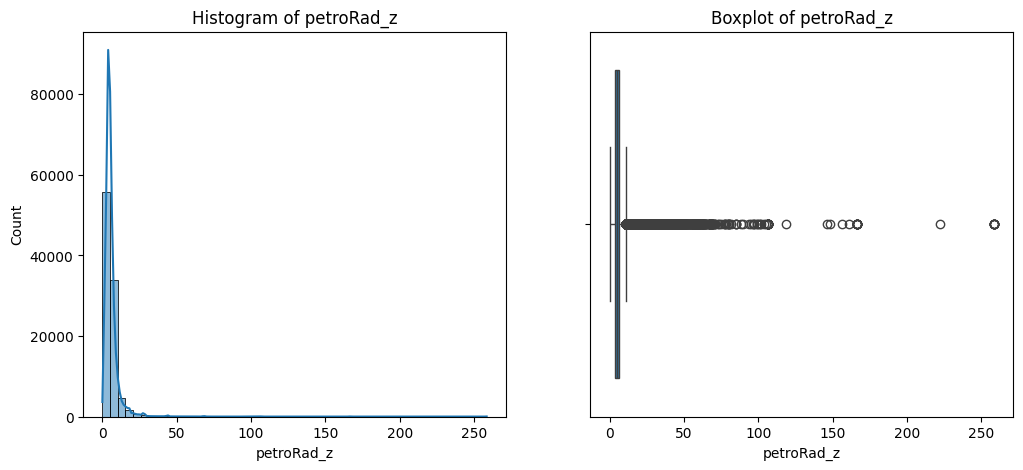

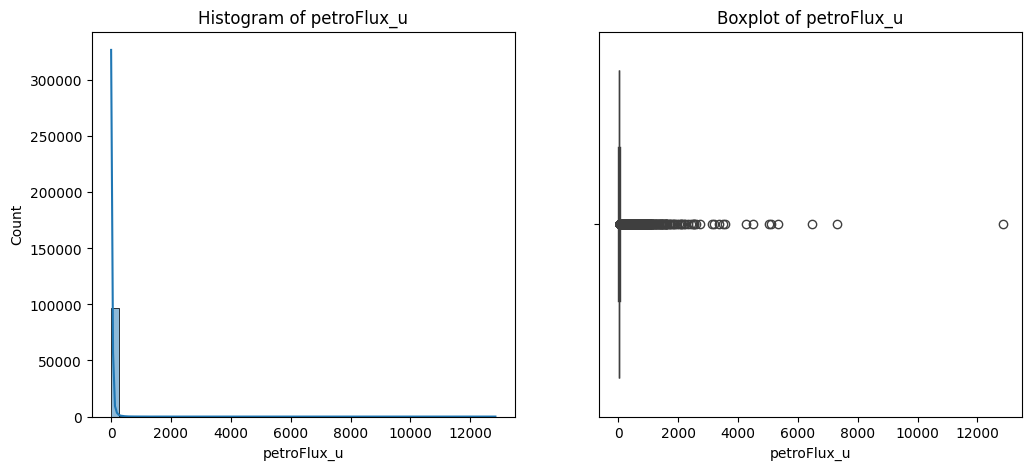

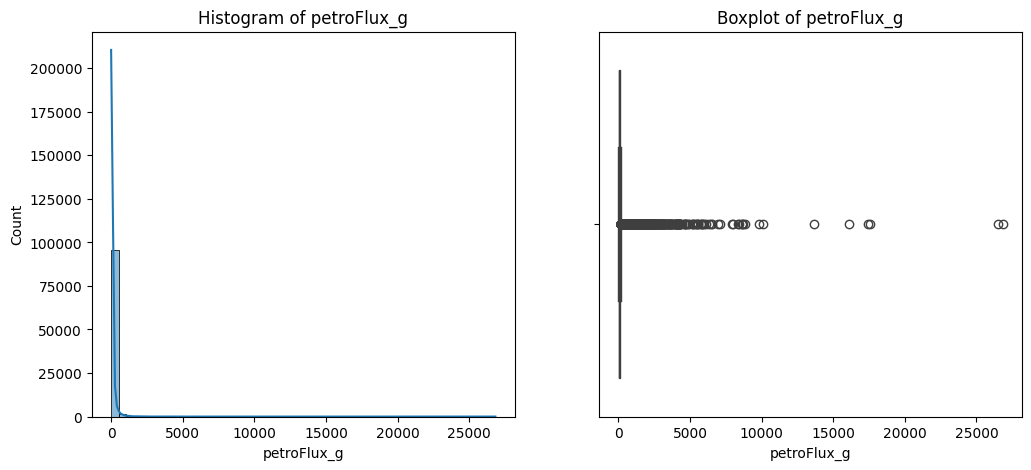

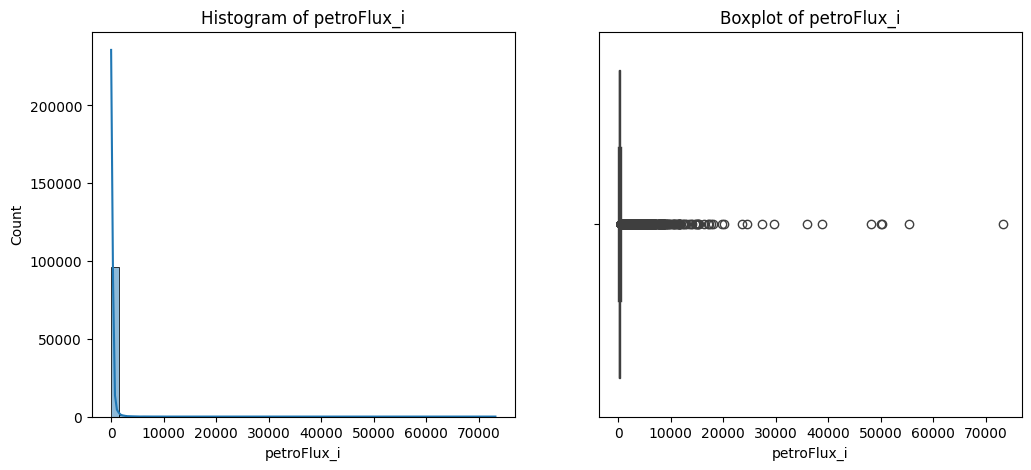

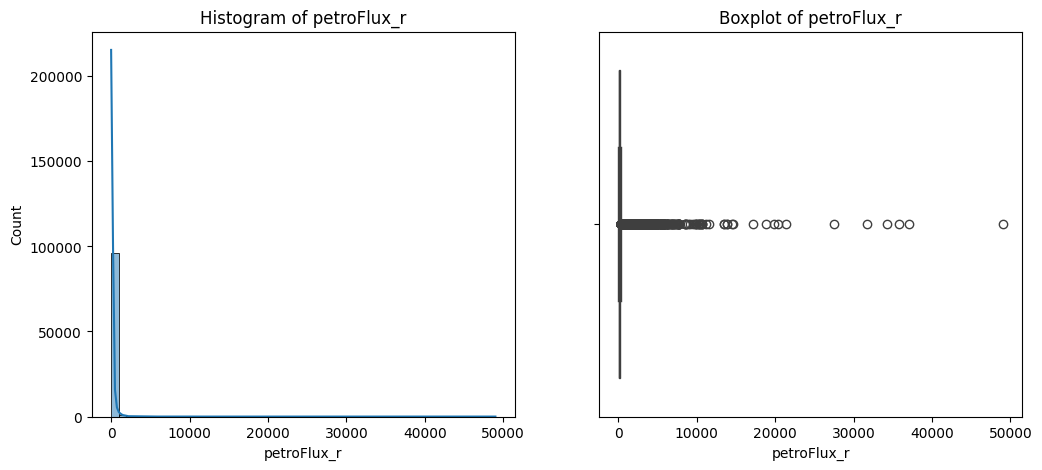

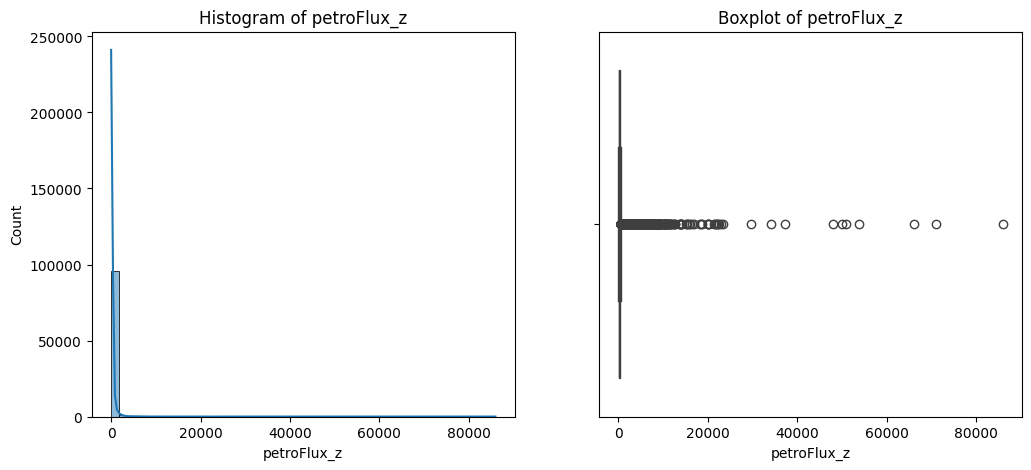

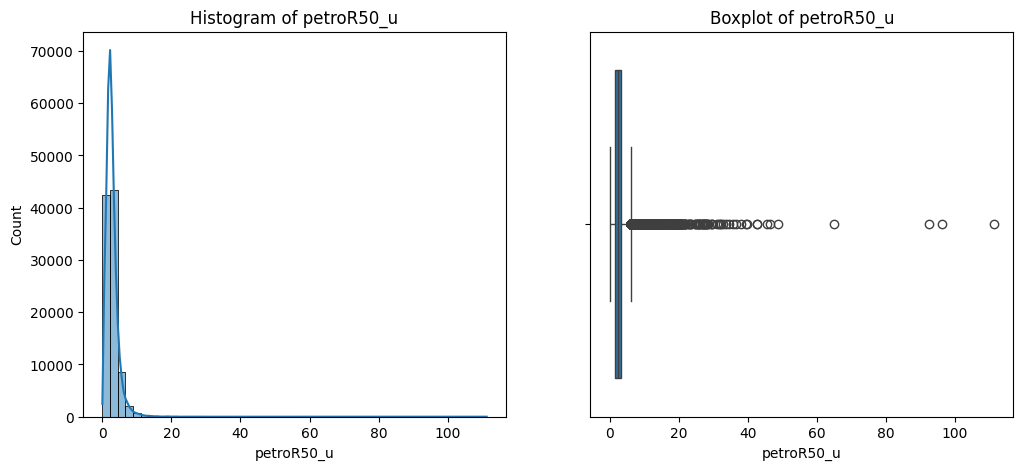

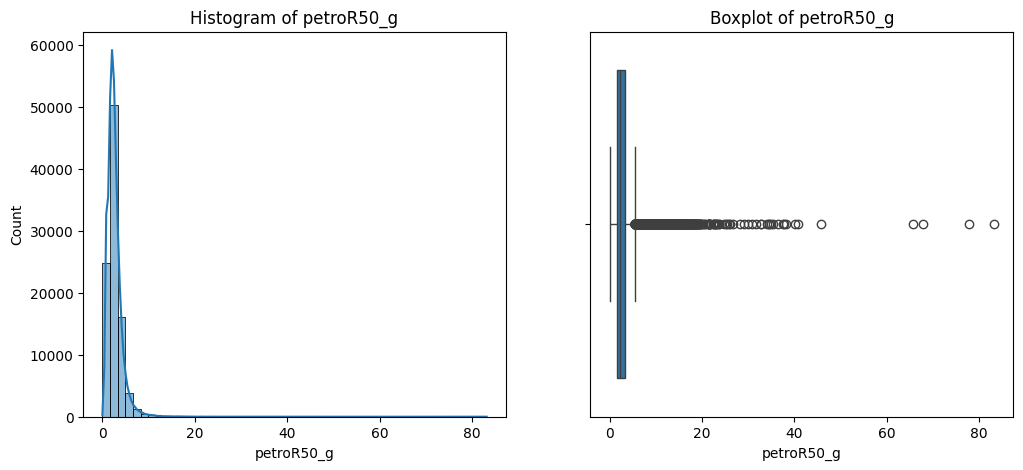

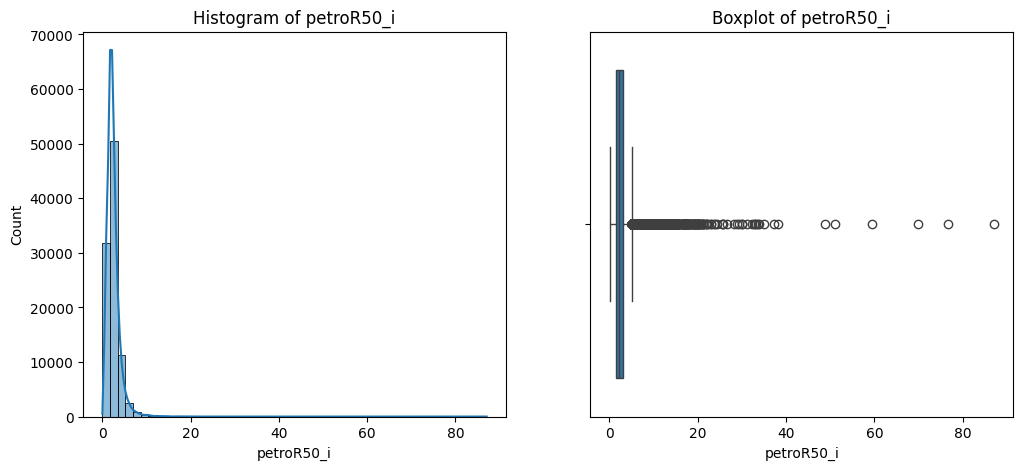

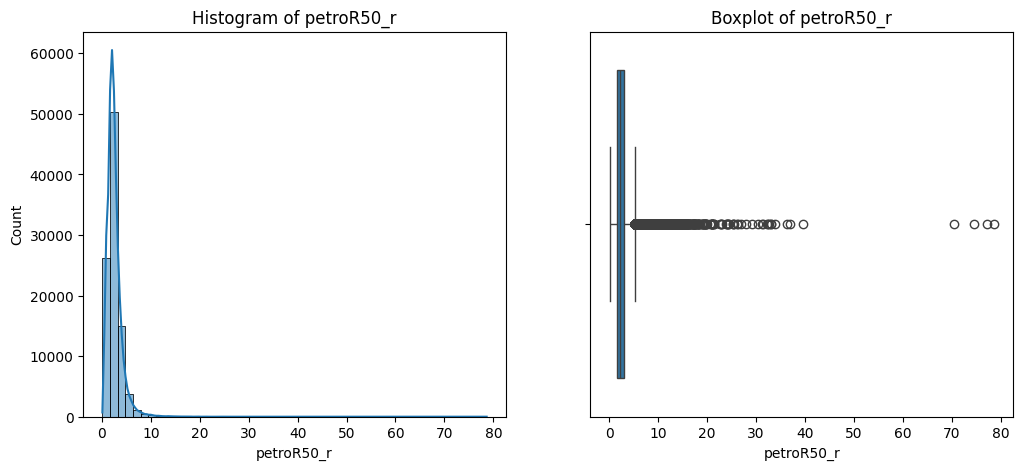

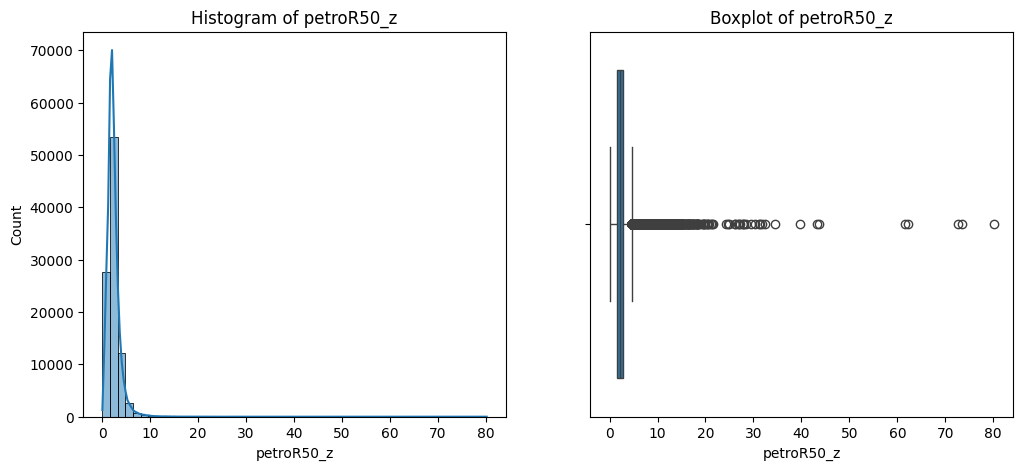

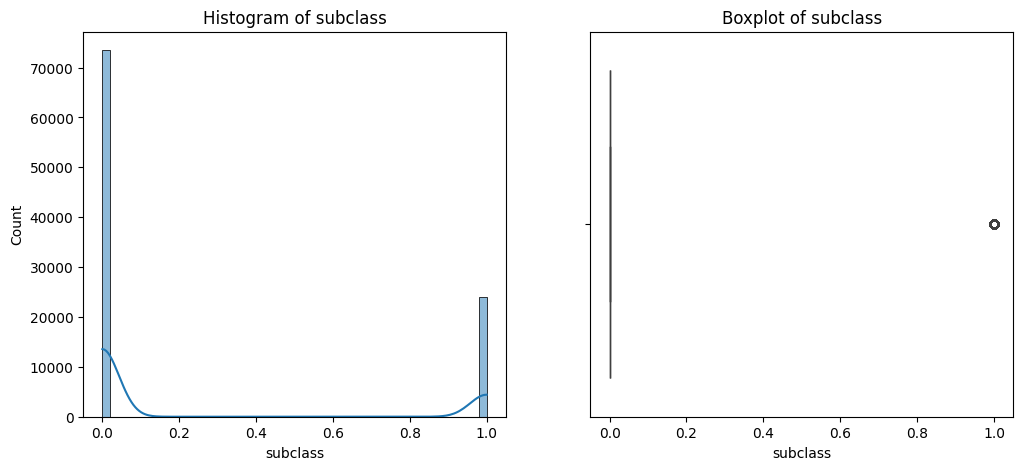

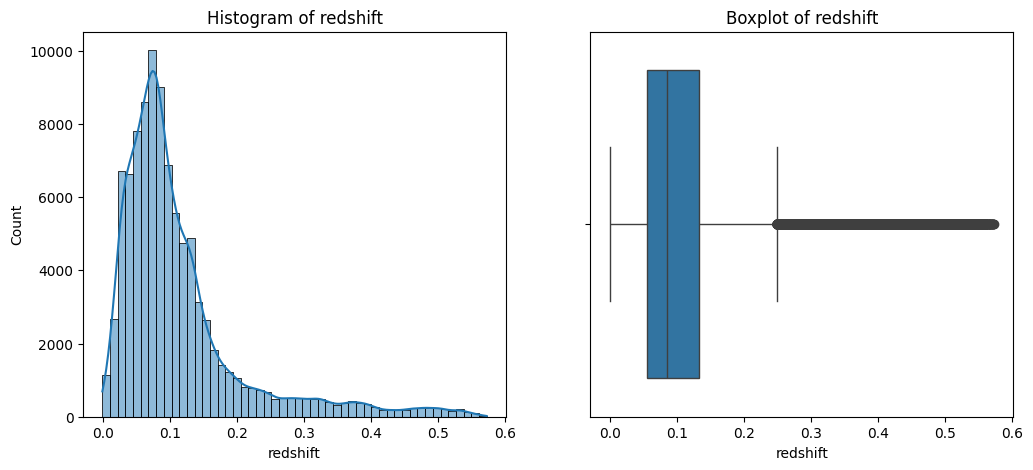

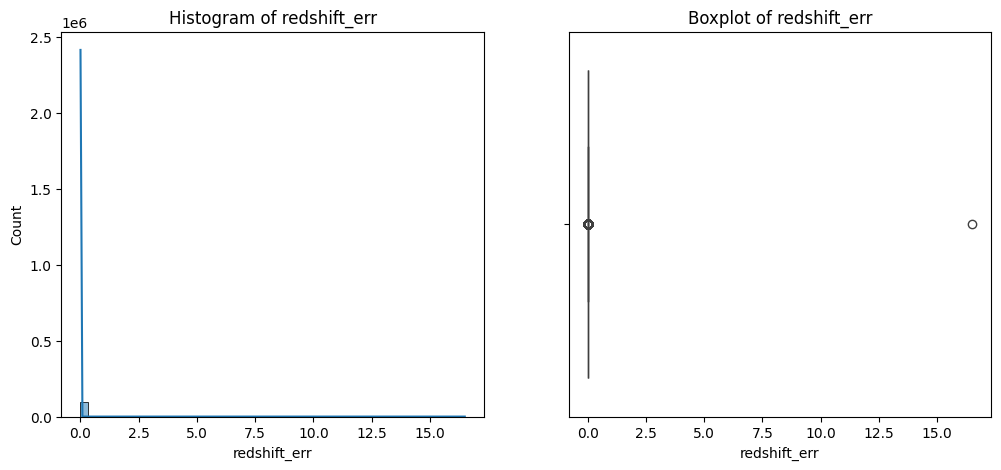

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume your dataframe is `data_sdss_nonulls`

# Set thresholds
skew_threshold = 1
kurtosis_threshold = 3

# Select numeric columns
numeric_cols = data_sdss_nonulls.select_dtypes(include=['float64', 'int64']).columns

# Compute skewness and kurtosis
skew_vals = data_sdss_nonulls[numeric_cols].skew()
kurtosis_vals = data_sdss_nonulls[numeric_cols].kurtosis()

# Features to plot
features_to_plot = skew_vals[(abs(skew_vals) > skew_threshold) | (kurtosis_vals > kurtosis_threshold)].index.tolist()

print(f"Features selected for plotting: {features_to_plot}")

# Plot histograms and boxplots
for col in features_to_plot:
    plt.figure(figsize=(12,5))

    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(data_sdss_nonulls[col], kde=True, bins=50)
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=data_sdss_nonulls[col])
    plt.title(f'Boxplot of {col}')

    plt.show()


Strongest correlated features with subclass:
petroR50_u   -0.279282
petroR50_g   -0.273077
petroR50_r   -0.254428
petroR50_i   -0.245415
petroR50_z   -0.236671
petroRad_r   -0.232777
petroRad_g   -0.222459
petroRad_i   -0.187993
petroRad_z   -0.133799
petroRad_u   -0.127297
expAB_z      -0.123476
psfMag_u     -0.105586
expAB_u      -0.104255
psfMag_g      0.105080
u             0.166843
redshift      0.178594
psfMag_r      0.229063
specobjid     0.268268
psfMag_i      0.268475
g             0.294820
psfMag_z      0.312786
r             0.369776
i             0.395774
z             0.419205
Name: subclass, dtype: float64


/tmp/ipython-input-3589140605.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=strong_corr.values, y=strong_corr.index, palette="coolwarm")


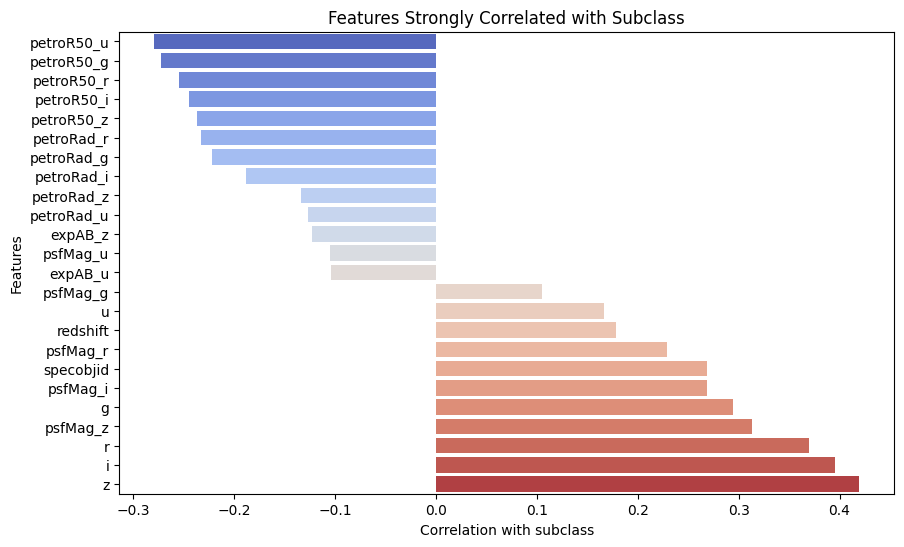

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlations with the target
corr_with_target = data_sdss_nonulls.corr(numeric_only=True)['subclass'].drop('subclass')

# Select features with |correlation| ≥ 0.1
strong_corr = corr_with_target[abs(corr_with_target) >= 0.1].sort_values()

print("Strongest correlated features with subclass:")
print(strong_corr)

# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=strong_corr.values, y=strong_corr.index, palette="coolwarm")
plt.title("Features Strongly Correlated with Subclass")
plt.xlabel("Correlation with subclass")
plt.ylabel("Features")
plt.show()


/tmp/ipython-input-966809930.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data_sdss_nonulls['subclass'], y=data_sdss_nonulls[col], palette="Set2")
/tmp/ipython-input-966809930.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data_sdss_nonulls['subclass'], y=data_sdss_nonulls[col], palette="Set2")
/tmp/ipython-input-966809930.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data_sdss_nonulls['subclass'], y=data_sdss_nonulls[col], palette="Set2")
/tmp/ipython-input-966809930.py:6: FutureWarning: 

Passing `palette` without a

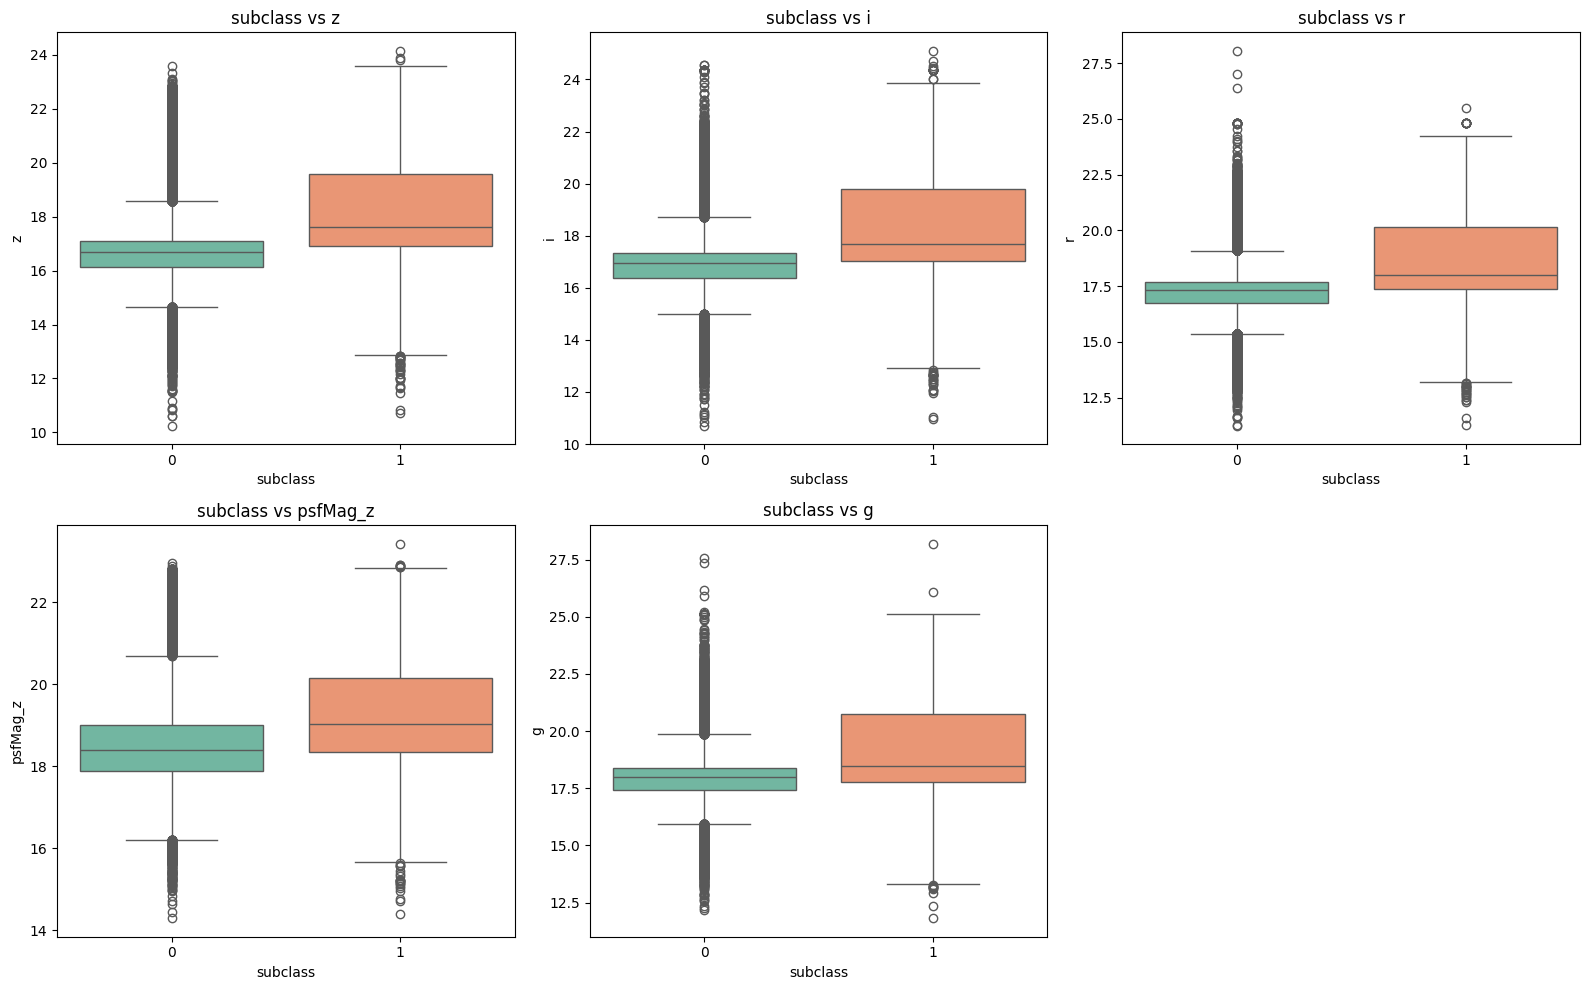

In [ ]:
top_features = strong_corr.abs().sort_values(ascending=False).head(5).index

plt.figure(figsize=(16, 10))
for i, col in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data_sdss_nonulls['subclass'], y=data_sdss_nonulls[col], palette="Set2")
    plt.title(f"subclass vs {col}")
plt.tight_layout()
plt.show()


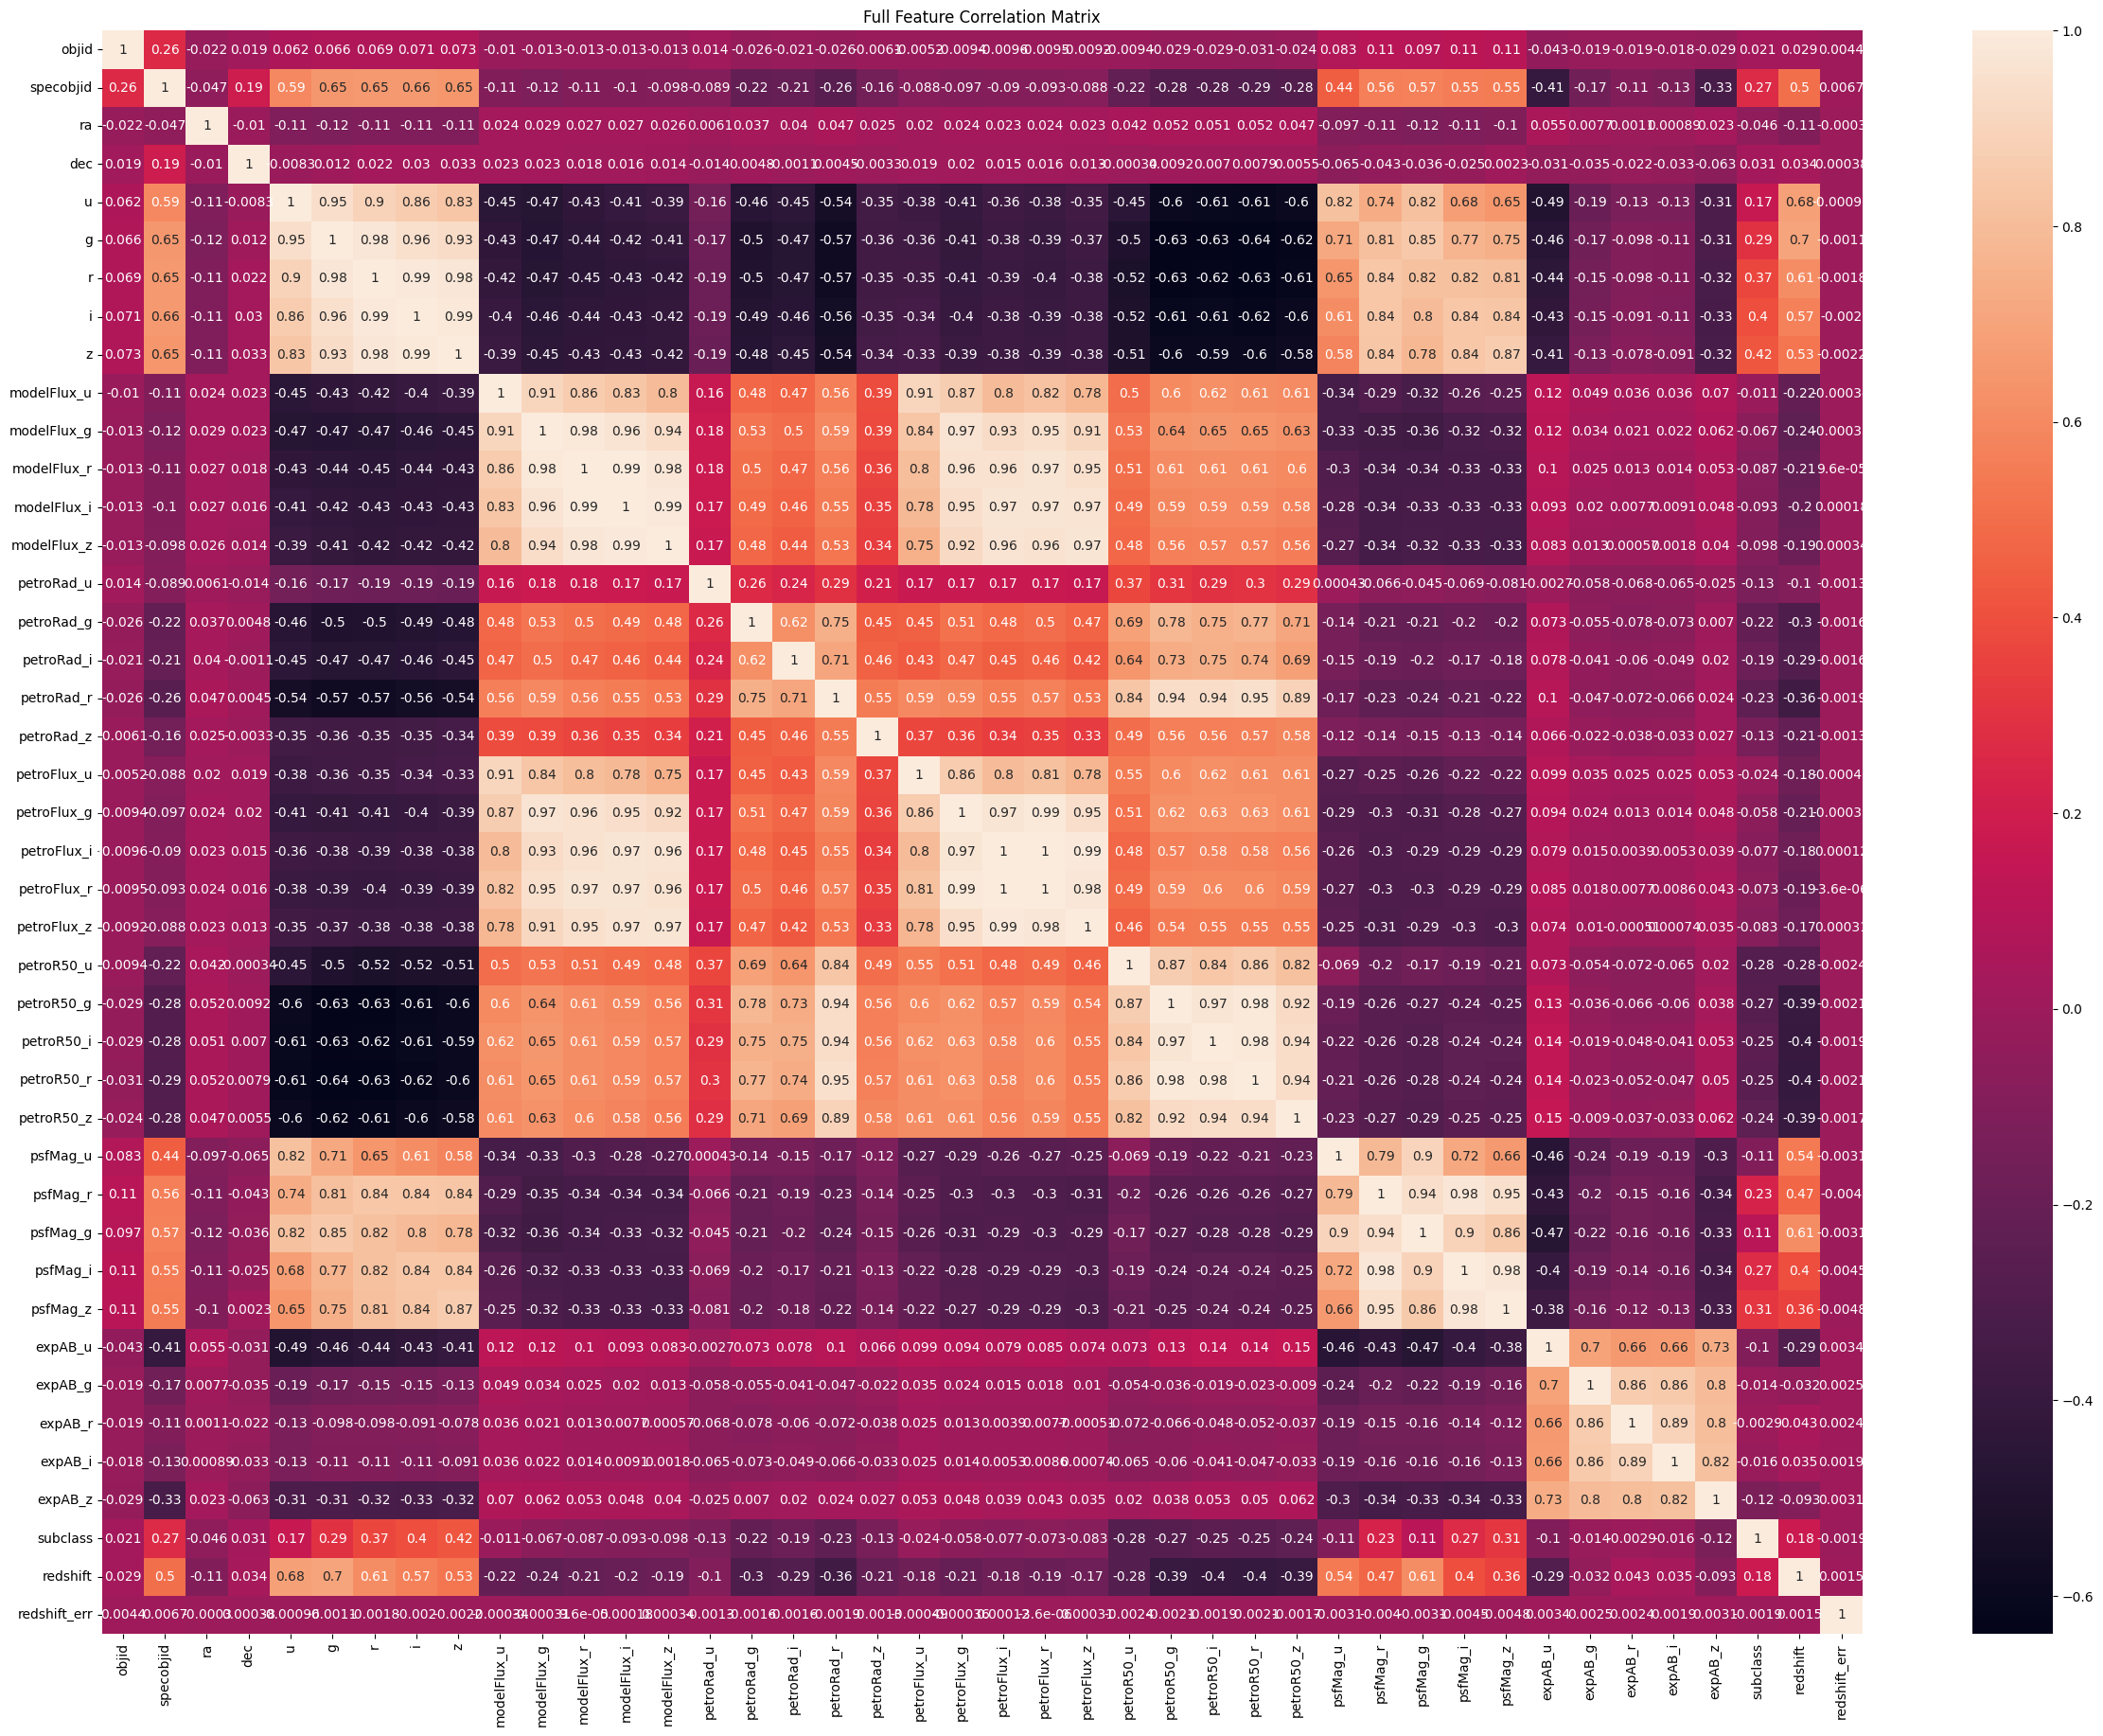

In [ ]:
plt.figure(figsize=(30, 22))

data_corr = data_sdss_nonulls.drop("class", axis=1)

sns.heatmap(data_corr.corr(), annot=True)
plt.title("Full Feature Correlation Matrix")
plt.show()


In [ ]:
import numpy as np

# Make a copy
data_sdss_iqr = data_sdss_nonulls.copy()

# Identify numeric columns except ids and target
numeric_cols = data_sdss_iqr.select_dtypes(include=[np.number]).columns

cols_to_exclude = ['objid', 'specobjid', 'subclass']  # do not clip these
numeric_cols = [col for col in numeric_cols if col not in cols_to_exclude]

# Apply IQR clipping
for col in numeric_cols:
    Q1 = data_sdss_iqr[col].quantile(0.25)
    Q3 = data_sdss_iqr[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip
    data_sdss_iqr[col] = np.clip(data_sdss_iqr[col], lower_bound, upper_bound)

print("IQR outlier clipping completed.")


IQR outlier clipping completed.


In [ ]:
import numpy as np

# Compute skewness on numeric columns
skew_vals = data_sdss_iqr.select_dtypes(include=[np.number]).skew().abs()

# Pick top 5 most skewed features
top5_features = skew_vals.sort_values(ascending=False).head(5).index.tolist()

print("Top 5 most skewed features:", top5_features)


Top 5 most skewed features: ['specobjid', 'subclass', 'redshift_err', 'petroRad_u', 'redshift']


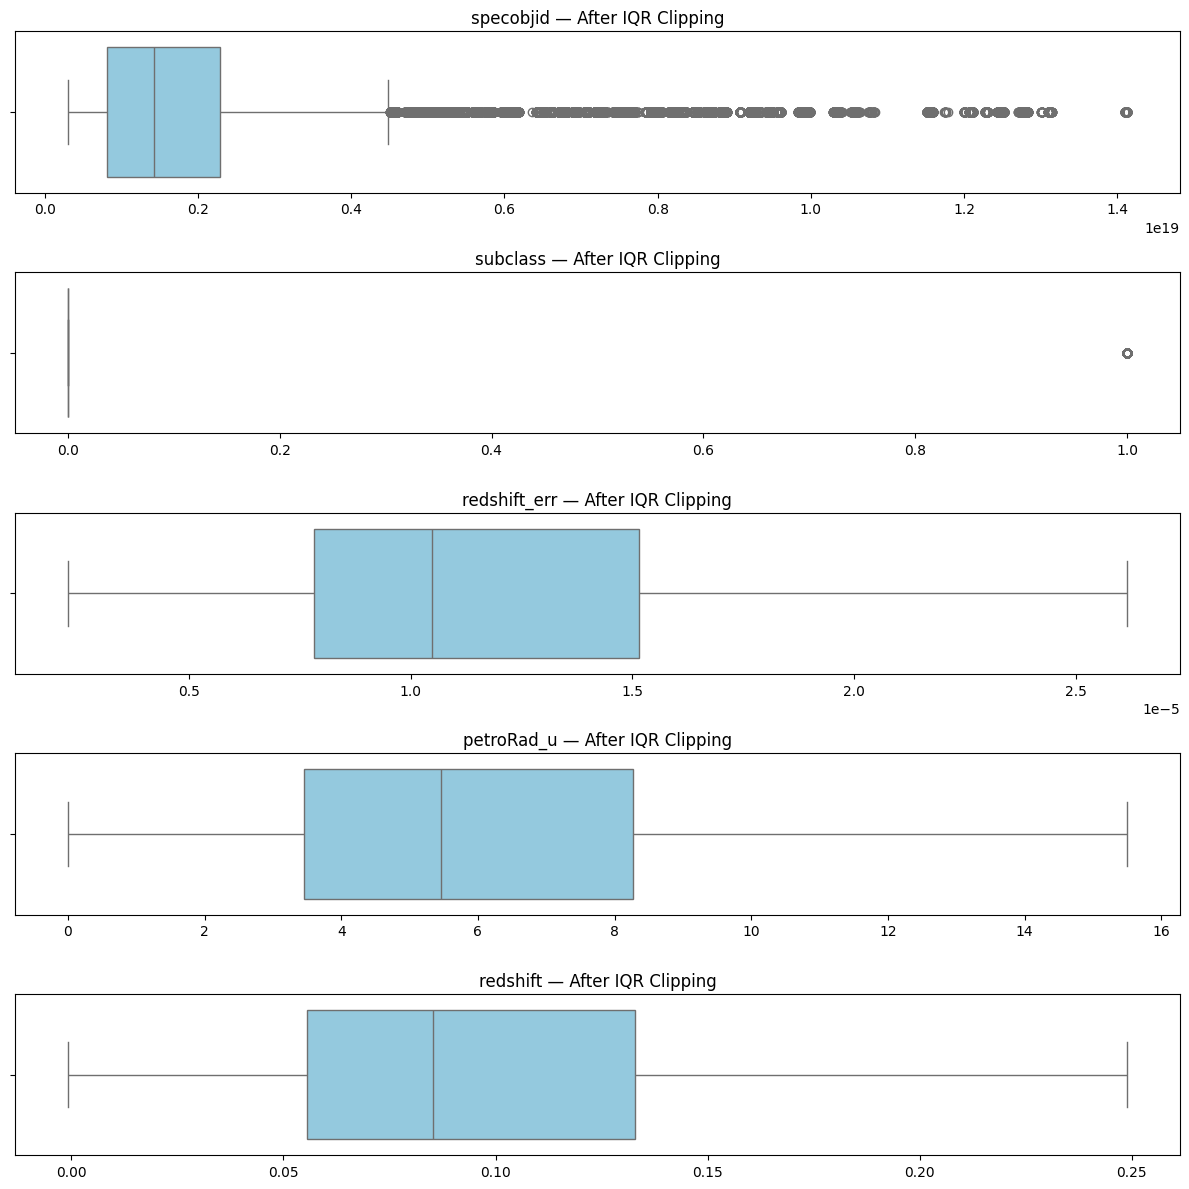

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 12))
for i, feature in enumerate(top5_features):
    plt.subplot(5, 1, i + 1)
    sns.boxplot(x=data_sdss_iqr[feature], color="skyblue")
    plt.title(f"{feature} — After IQR Clipping")
    plt.xlabel("")

plt.tight_layout()
plt.show()


In [ ]:
X = data_sdss_iqr.drop(['subclass', 'class', ], axis =1)
y = data_sdss_iqr['subclass']

In [ ]:
# Assuming 'X' and 'y' are your data and target variables
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

# Step 1: Select the top k features using SelectKBest (we already did this)
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_selected = selector.fit_transform(X, y)

# Get the names of the selected features
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)

# Step 2: Filter X to include only the selected features
X_selected_df = X[selected_features]

# Step 3: Split the data into training and testing sets using the selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Check the features and shapes after splitting
print("Features in X_train:", X_train.columns.tolist())
print("Features in X_test:", X_test.columns.tolist())
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")


Selected features: Index(['r', 'i', 'z', 'petroRad_g', 'petroRad_r', 'petroR50_u', 'petroR50_g',
       'petroR50_i', 'petroR50_r', 'petroR50_z'],
      dtype='object')
Features in X_train: ['r', 'i', 'z', 'petroRad_g', 'petroRad_r', 'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r', 'petroR50_z']
Features in X_test: ['r', 'i', 'z', 'petroRad_g', 'petroRad_r', 'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r', 'petroR50_z']
Shape of X_train: (77982, 10)
Shape of X_test: (19496, 10)


In [ ]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scaled_data = scalar.fit_transform(X_train)
scaled_data

array([[-0.74101178, -0.67150596, -0.65339208, ...,  0.84320573,
         0.8211959 ,  0.95625588],
       [-0.70819548, -0.60473117, -0.53643388, ...,  0.33438867,
         0.2845895 ,  0.38501347],
       [ 0.43251102,  0.51460762,  0.62302713, ..., -0.46250576,
        -0.53998412, -0.74084811],
       ...,
       [-0.82743645, -0.8303173 , -0.82149052, ...,  0.43969888,
         0.39825511,  0.37662589],
       [ 0.19722712,  0.20586223,  0.15542616, ..., -0.46381998,
        -0.47127483, -0.38580431],
       [-1.25889881, -1.31002441, -1.34623301, ...,  1.06726083,
         0.87651066,  0.7963481 ]])